In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('.')
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

from pid_analysis_utils import get_scores, get_coeffs, compare_cum_vmc_vs_path_dist, compare_performance, draw_trajectories

# PID TAE

```bash
> python3 scripts/pid_coef_tuning.py --pid-algo=tae --episode-duration=100 --n-trials=300 --name="pid-coeffs-tuning-dist" --wind-dirs="[30,40,51,61,71,82,92,102,113,123,133,144,154,164,175,185,196,206,216,227,237,247,258,268,278,289,299,309,320,330]"
```

In [3]:
wind_dirs = [30,40,51,61,71,82,92,102,113,123,133,144,154,164,175,185,196,206,216,227,237,247,258,268,278,289,299,309,320,330]

## Eval the best PID coefficients for each wind direction

In [4]:
best_coeffs_top1_by_wind_dir = get_coeffs(wind_dirs, k=1)

for wind_dir, best_coeffs in best_coeffs_top1_by_wind_dir.items():
    Kp, Kd, Ki = best_coeffs['Kp'], best_coeffs['Kd'], best_coeffs['Ki']
    print(f'python3 scripts/eval_pid.py --pid-algo=tae --Kp={Kp} --Kd={Kd} --Ki={Ki} --wind-dir={wind_dir} --n=10 --name=pid-tae-top1-{wind_dir}deg')

Processing tuning results:   0%|          | 0/30 [00:00<?, ?it/s]

Processing tuning results: 100%|██████████| 30/30 [00:20<00:00,  1.47it/s]

python3 scripts/eval_pid.py --pid-algo=tae --Kp=0.5563507854744248 --Kd=0.00020857576280247753 --Ki=0.0009686421458073381 --wind-dir=30 --n=10 --name=pid-tae-top1-30deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=0.9858701840858477 --Kd=0.00463323145072013 --Ki=0.0007664189162241486 --wind-dir=40 --n=10 --name=pid-tae-top1-40deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=1.1861707721068644 --Kd=0.007222235480033561 --Ki=0.42343225469883733 --wind-dir=51 --n=10 --name=pid-tae-top1-51deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=0.0031090789895718103 --Kd=0.029847990551826215 --Ki=0.001784358818784415 --wind-dir=61 --n=10 --name=pid-tae-top1-61deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=0.7671624807959271 --Kd=0.0008464863115551476 --Ki=0.008453098223474929 --wind-dir=71 --n=10 --name=pid-tae-top1-71deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=0.8438420195039525 --Kd=0.07747675436790213 --Ki=0.08372316495187285 --wind-dir=82 --n=10 --name=pid-tae-top1-82deg


## Eval the **median** of the $5$ bests PID coefficients for each wind direction

In [18]:
best_coeffs_median5_by_wind_dir = get_coeffs(wind_dirs, k=5, statistic='median')

for wind_dir, best_coeffs in best_coeffs_median5_by_wind_dir.items():
    Kp, Kd, Ki = best_coeffs['Kp'], best_coeffs['Kd'], best_coeffs['Ki']
    print(f'python3 scripts/eval_pid.py --pid-algo=tae --Kp={Kp} --Kd={Kd} --Ki={Ki} --wind-dir={wind_dir} --n=10 --name=pid-tae-median-top5-{wind_dir}deg')

Processing tuning results: 100%|██████████| 30/30 [00:15<00:00,  1.99it/s]

python3 scripts/eval_pid.py --pid-algo=tae --Kp=0.01938179381349279 --Kd=0.050117570811384 --Ki=0.00036557693286414026 --wind-dir=30 --n=10 --name=pid-tae-median-top5-30deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=0.24797441173238197 --Kd=0.19428667440485864 --Ki=0.0006978748419559092 --wind-dir=40 --n=10 --name=pid-tae-median-top5-40deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=0.9282722266281204 --Kd=0.002306619527563416 --Ki=0.0006427549027269735 --wind-dir=51 --n=10 --name=pid-tae-median-top5-51deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=1.0831381425791555 --Kd=0.005874321340687323 --Ki=0.013114322855478849 --wind-dir=61 --n=10 --name=pid-tae-median-top5-61deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=1.3585278719552079 --Kd=0.0011003170388651444 --Ki=0.002754183411448548 --wind-dir=71 --n=10 --name=pid-tae-median-top5-71deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=1.304775059416187 --Kd=0.003622603640333344 --Ki=0.04708238693584302 --wind-dir=82 -

## Eval the **mean** of the $5$ bests PID coefficients for each wind direction

In [19]:
best_coeffs_mean5_by_wind_dir = get_coeffs(wind_dirs, k=5, statistic='mean')

for wind_dir, best_coeffs in best_coeffs_mean5_by_wind_dir.items():
    Kp, Kd, Ki = best_coeffs['Kp'], best_coeffs['Kd'], best_coeffs['Ki']
    print(f'python3 scripts/eval_pid.py --pid-algo=tae --Kp={Kp} --Kd={Kd} --Ki={Ki} --wind-dir={wind_dir} --n=10 --name=pid-tae-mean-top5-{wind_dir}deg')

Processing tuning results:   0%|          | 0/30 [00:00<?, ?it/s]

Processing tuning results: 100%|██████████| 30/30 [00:17<00:00,  1.75it/s]

python3 scripts/eval_pid.py --pid-algo=tae --Kp=0.016497908705916213 --Kd=0.07488447758803793 --Ki=0.0003949473451476156 --wind-dir=30 --n=10 --name=pid-tae-mean-top5-30deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=0.2329748454494153 --Kd=0.19570942281990605 --Ki=0.0006756390927290503 --wind-dir=40 --n=10 --name=pid-tae-mean-top5-40deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=0.9720405207451053 --Kd=0.0033694538354009595 --Ki=0.0032861792127048583 --wind-dir=51 --n=10 --name=pid-tae-mean-top5-51deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=1.1830134284167175 --Kd=0.007422564218942862 --Ki=0.01626984975447638 --wind-dir=61 --n=10 --name=pid-tae-mean-top5-61deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=1.3509698963246586 --Kd=0.0011266738478995903 --Ki=0.053221162752646836 --wind-dir=71 --n=10 --name=pid-tae-mean-top5-71deg
python3 scripts/eval_pid.py --pid-algo=tae --Kp=1.2374209894707524 --Kd=0.006809313894398714 --Ki=0.05811367433688523 --wind-dir=82 --n=10 --

## Coefficients comparison for each wind direction

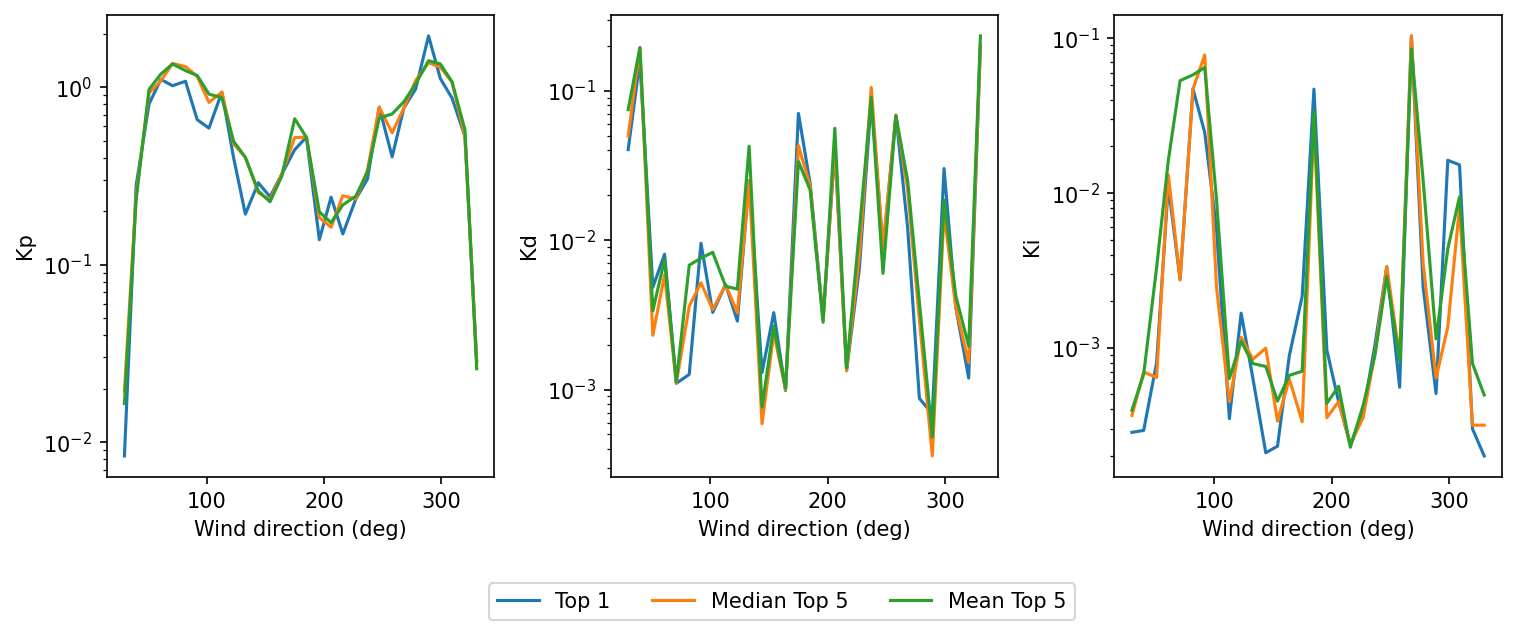

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=150)
fig.subplots_adjust(wspace=.3)

for i, coeff in enumerate(['Kp', 'Kd', 'Ki']):
    ax = axs[i]
    ax.plot(wind_dirs, [best_coeffs_top1_by_wind_dir[wind_dir][coeff] for wind_dir in wind_dirs], label='Top 1' if i == 0 else None)
    ax.plot(wind_dirs, [best_coeffs_median5_by_wind_dir[wind_dir][coeff] for wind_dir in wind_dirs], label='Median Top 5' if i == 0 else None)
    ax.plot(wind_dirs, [best_coeffs_mean5_by_wind_dir[wind_dir][coeff] for wind_dir in wind_dirs], label='Mean Top 5' if i == 0 else None)
    ax.set_xlabel('Wind direction (deg)')
    ax.set_ylabel(coeff)
    ax.set_yscale('log')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -.05), ncol=3);

## Eval using same PID coefficients for all wind directions

### Using median

In [269]:
best_coeffs = best_coeffs_median5_by_wind_dir.values()
Kps, Kds, Kis = zip(*[(coeff['Kp'], coeff['Kd'], coeff['Ki']) for coeff in best_coeffs])
Kp, Kd, Ki = np.median(Kps), np.median(Kds), np.median(Kis)
print(f'python3 scripts/multi_eval_pid.py --wind-dirs="{wind_dirs.astype(int).tolist()}" --pid-algo=tae --Kp={Kp} --Kd={Kd} --Ki={Ki} --n=10 --name=pid-tae-median-median-top5')

python3 scripts/multi_eval_pid.py --wind-dirs="[30, 40, 51, 61, 71, 82, 92, 102, 113, 123, 133, 144, 154, 164, 175, 185, 196, 206, 216, 227, 237, 247, 258, 268, 278, 289, 299, 309, 320, 330]" --pid-algo=tae --Kp=0.5250113231150243 --Kd=0.00512388141150684 --Ki=0.0008589324677228019 --n=10 --name=pid-tae-median-median-top5


### Using mean

In [270]:
best_coeffs = best_coeffs_median5_by_wind_dir.values()
Kps, Kds, Kis = zip(*[(coeff['Kp'], coeff['Kd'], coeff['Ki']) for coeff in best_coeffs])
Kp, Kd, Ki = np.mean(Kps), np.mean(Kds), np.mean(Kis)
print(f'python3 scripts/multi_eval_pid.py --wind-dirs="{wind_dirs.astype(int).tolist()}" --pid-algo=tae --Kp={Kp} --Kd={Kd} --Ki={Ki} --n=10 --name=pid-tae-mean-median-top5')

python3 scripts/multi_eval_pid.py --wind-dirs="[30, 40, 51, 61, 71, 82, 92, 102, 113, 123, 133, 144, 154, 164, 175, 185, 196, 206, 216, 227, 237, 247, 258, 268, 278, 289, 299, 309, 320, 330]" --pid-algo=tae --Kp=0.6403936503089891 --Kd=0.028641937203193798 --Ki=0.01012959196329757 --n=10 --name=pid-tae-mean-median-top5


## Performance comparison for each wind direction

Processing folders: 100%|██████████| 30/30 [00:04<00:00,  6.55it/s]


+--------------+---------------+-------------+
|              | Path distance |   Mean XTE  |
+--------------+---------------+-------------+
|    Top 1     |  22.96 ± 1.08 | 0.56 ± 0.26 |
| Median Top 5 |  23.38 ± 0.93 | 0.59 ± 0.27 |
|  Mean Top 5  |  23.37 ± 0.96 | 0.57 ± 0.26 |
+--------------+---------------+-------------+


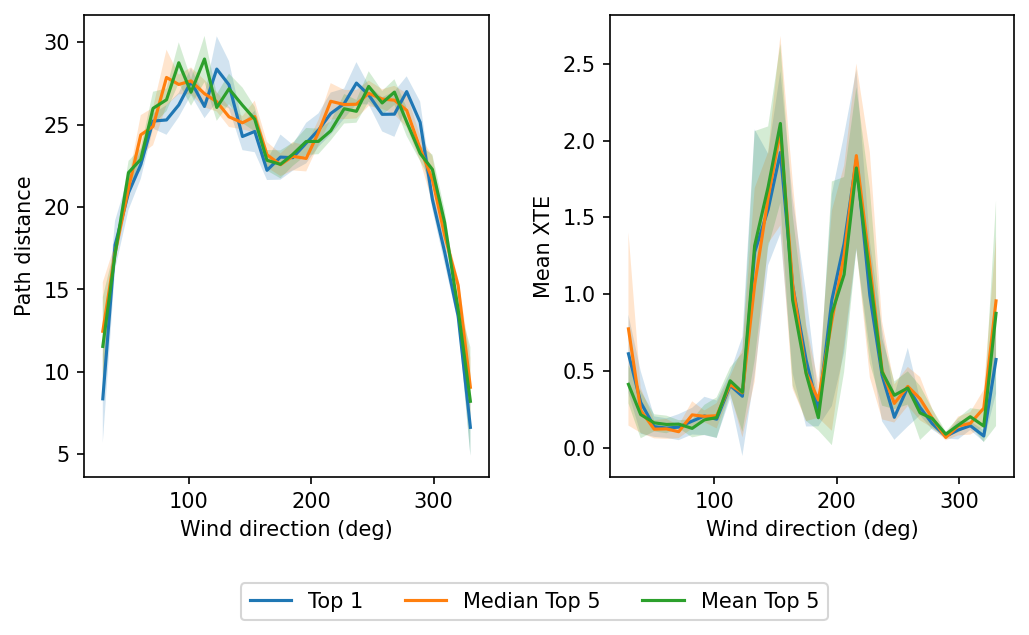

In [37]:
# compare_performance(
#     names=['pid-tae-top1', 'pid-tae-median-top5', 'pid-tae-mean-top5'],
#     names_labels=['Top 1', 'Median Top 5', 'Mean Top 5'],
#     metrics=['cum_vmc'],
#     metrics_labels=['Cumulative VMC'])

compare_performance(
    names=['pid-tae-top1', 'pid-tae-median-top5', 'pid-tae-mean-top5'],
    names_labels=['Top 1', 'Median Top 5', 'Mean Top 5'],
    metrics=['path_dist', 'mean_xte'],
    metrics_labels=['Path distance', 'Mean XTE'])

Drawing trajectories of pid-tae-mean-top5-92deg
219.91751
225.56439
225.4114
226.3994
226.18167
224.05127
224.8701
224.28568
224.89291
225.24782
Drawing trajectories of debug-5
338.30768


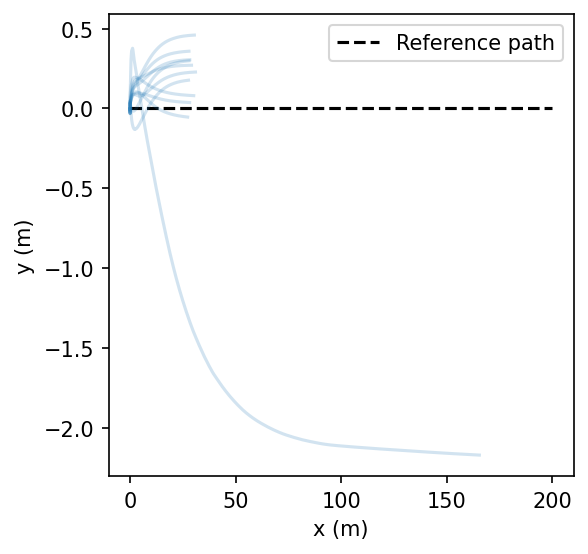

In [39]:
draw_trajectories(['pid-tae-mean-top5-92deg', 'debug-5'])

## Solving issue between VMC and Path distance

We should have $\text{Cum VMC} = \text{Path distance}$ but we don't. Visually, the shape approximatly match. This might indicated that both are linearly correlated. We can try to find a linear regression between the two.

In [177]:
cum_vmcs, path_dists, time_factors = compare_cum_vmc_vs_path_dist('pid-tae-*')

Processing CSV files: 100%|██████████| 900/900 [00:14<00:00, 62.23it/s]


In [206]:
1/0.44451

2.249668173944343

Linear regression: 0.44451 * Cumulative VMC


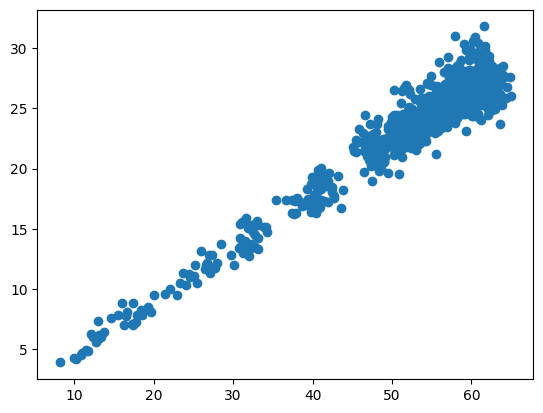

In [205]:
from sklearn.linear_model import LinearRegression

X = np.array(cum_vmcs*(1/10)/time_factors).reshape(-1, 1)
y = np.array(path_dists).reshape(-1, 1)
reg = LinearRegression(fit_intercept=False).fit(X, y)
plt.scatter(cum_vmcs*(1/10)/time_factors, path_dists)

print(f'Linear regression: {reg.coef_[0][0]:.5f} * Cumulative VMC')


In [203]:
cum_vmcs[11]*(1/10)/time_factors[11], path_dists[11]

(27.92750467117115, 12.119698123100001)

In [196]:
(1/10)/(np.mean(time_factors))

0.27306678567129

In [195]:
np.mean(.1*time_factors*10/3)

0.12207025930081096

Linear regression: 0.12158 * Cumulative VMC


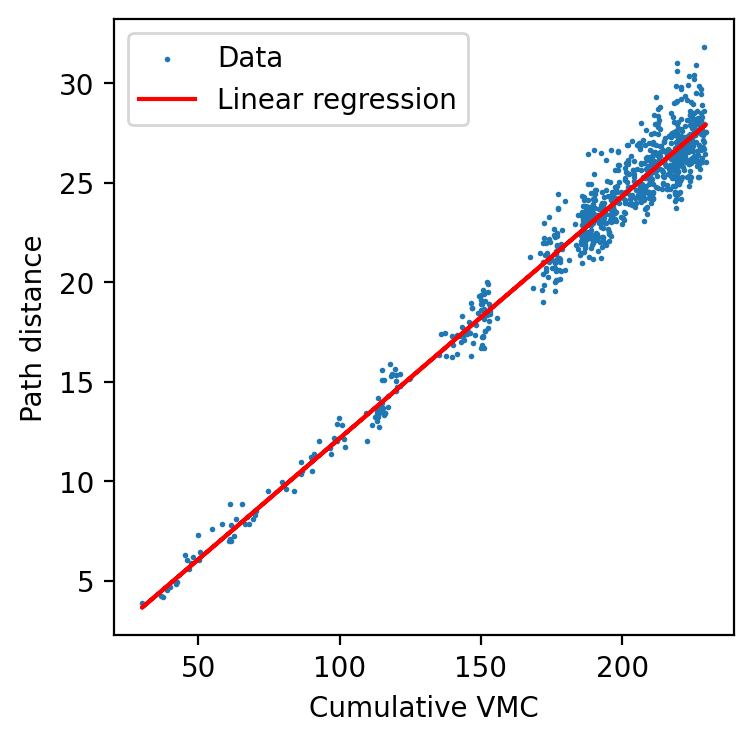

In [178]:
from sklearn.linear_model import LinearRegression

X = np.array(cum_vmcs).reshape(-1, 1)
y = np.array(path_dists).reshape(-1, 1)
reg = LinearRegression(fit_intercept=False).fit(X, y)

plt.figure(figsize=(4, 4), dpi=200)
plt.scatter(cum_vmcs, path_dists, s=1, label='Data')
plt.plot(X, reg.predict(X), color='red', label='Linear regression')
plt.xlabel('Cumulative VMC')
plt.ylabel('Path distance')
plt.legend();

print(f'Linear regression: {reg.coef_[0][0]:.5f} * Cumulative VMC')

Linear regression: 0.12158 * Cumulative VMC


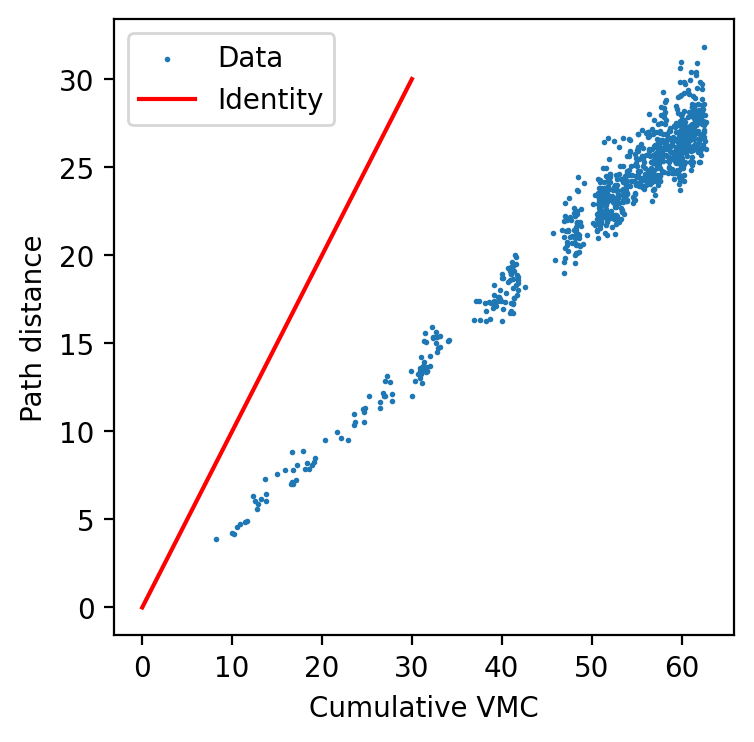

In [198]:
plt.figure(figsize=(4, 4), dpi=200)
plt.scatter(cum_vmcs*(1/10)/(np.mean(time_factors)), path_dists, s=1, label='Data')
plt.plot(np.linspace(0, 30, 100), np.linspace(0, 30, 100), color='red', label='Identity')
plt.xlabel('Cumulative VMC')
plt.ylabel('Path distance')
plt.legend();

print(f'Linear regression: {reg.coef_[0][0]:.5f} * Cumulative VMC')

In [40]:
import pandas as pd

df = pd.read_csv('/home/lamsade/lmarandat/internship-m2/sailboat-drl/runs/debug-6/eval-90.0deg/0/progress.csv')

In [44]:
p_start, p_end = df[["obs/p_boat/0",
                        "obs/p_boat/1"]].iloc[[0, -1]].values
path_dist = (p_end - p_start)[0]

df['obs/cum_obs/gain_dist/0'], path_dist

(0     -0.001309
 1      0.086333
 2      0.128456
 3      0.178075
 4      0.268222
         ...    
 95    22.524290
 96    22.753794
 97    22.869654
 98    23.618298
 99    23.772776
 Name: obs/cum_obs/gain_dist/0, Length: 100, dtype: float64,
 23.77408537)

In [7]:
df['time/step'][]

0      0.012738
1      0.257983
2      0.022074
3      0.013420
4      0.073505
         ...   
995    0.009637
996    0.010087
997    0.016083
998    0.014875
999    5.222242
Name: time/step, Length: 1000, dtype: float64

In [8]:
p_start, p_end = df[["obs/p_boat/0",
                        "obs/p_boat/1"]].iloc[[0, -1]].values
path_dist = (p_end - p_start)[0]

((1/10)/df['time/step'][:-1]*df['obs/vmc/0']).sum(), path_dist

(1561.6764888715916, 176.16512852)

In [236]:
((1/10)/df['time/step']*df['obs/vmc/0']).sum(), path_dist

(142.35273104017966, 158.27454494)

In [226]:
p_start, p_end = df[["obs/p_boat/0",
                        "obs/p_boat/1"]].iloc[[0, -1]].values
path_dist = (p_end - p_start)[0]

((1/10)/df['time/step']*df['obs/vmc/0']).sum(), path_dist

(146.9922854455113, 141.18202455)

In [6]:
import pandas as pd

In [16]:
df = pd.read_csv('../runs/pid-tae-median-top5-92deg/eval-92.0deg/0/progress.csv')
df['time/factor']
# df['obs/cum_obs/gain_dist/0'] / df['time/factor']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
995         NaN
996         NaN
997         NaN
998         NaN
999    0.583807
Name: time/factor, Length: 1000, dtype: float64

In [19]:
1/(0.32453*1/10)

30.813792253412633

In [17]:
df = pd.read_csv('/home/lamsade/lmarandat/internship-m2/sailboat-drl/runs/pid-coeffs-tuning-92deg-55/eval-92deg/0/progress.csv')
df['time/factor']
# df['obs/cum_obs/gain_dist/0']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
995        NaN
996        NaN
997        NaN
998        NaN
999    0.32453
Name: time/factor, Length: 1000, dtype: float64